<a href="https://colab.research.google.com/github/DarkKillX/MachineLearningTasks/blob/main/9WeekTasks/Heart_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Dery Hidayat

NIM: 1103228181

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mengganti 'path_to_file' dengan path file Anda
file_path = '/content/drive/MyDrive/Datasheet/heart baru.csv'
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- **Umur: Umur individu.
- **Jenis Kelamin: Jenis kelamin individu (1 = pria, 0 = wanita).
- **CP (Jenis Nyeri Dada): Jenis nyeri dada yang dialami individu. Seringkali dikategorikan menjadi empat tipe (0 hingga 3), menunjukkan tingkat keparahan yang berbeda.
- **Trestbps (Tekanan Darah Istirahat): Tekanan darah istirahat individu dalam mm Hg.
- **Chol (Kolesterol Serum): Tingkat kolesterol serum dalam mg/dL.
- **Fbs (Gula Darah Puasa): Tingkat gula darah puasa. Jika levelnya lebih besar dari 120 mg/dL, diwakili sebagai 1; sebaliknya, 0.
Restecg (Hasil Elektrokardiografi Istirahat): Hasil elektrokardiogram istirahat. Dapat memiliki nilai 0, 1, atau 2, mewakili kategori yang berbeda.
- **Thalach (Detak Jantung Maksimum Tercapai): Detak jantung maksimum yang dicapai selama uji latihan.
- **Exang (Angina yang Diinduksi Olahraga): Kehadiran angina yang diinduksi olahraga (1 = ya, 0 = tidak).
- **Oldpeak: Depresi ST yang diinduksi oleh latihan relatif terhadap istirahat.
- **Slope: Kemiringan segmen ST puncak latihan. Dapat memiliki nilai 0, 1, atau 2.
Ca (Jumlah Pembuluh Besar yang Berwarna oleh Fluoroskopi): Jumlah pembuluh besar (0-3) yang berwarna oleh fluoroskopi.
- **Thal (Hasil Tes Stres Thalium): Hasil tes stres thalium. Dapat memiliki nilai 0, 1, 2, atau 3.
Target: Kehadiran penyakit jantung. Seringkali bersifat biner (1 = hadir, 0 = tidak hadir).

Dataset yang digunakan untuk memprediksi keberadaan atau ketiadaan penyakit jantung berdasarkan berbagai fitur. Kolom 'target' kemungkinan adalah label yang menunjukkan keberadaan atau ketiadaan penyakit jantung, dan kolom lainnya adalah fitur yang digunakan untuk prediksi.

In [6]:
# Deskripsi statistik
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Cek missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Prompt: beri saya kode untuk melakukan Visualisasi EDA dari distribusi kulaitas wine

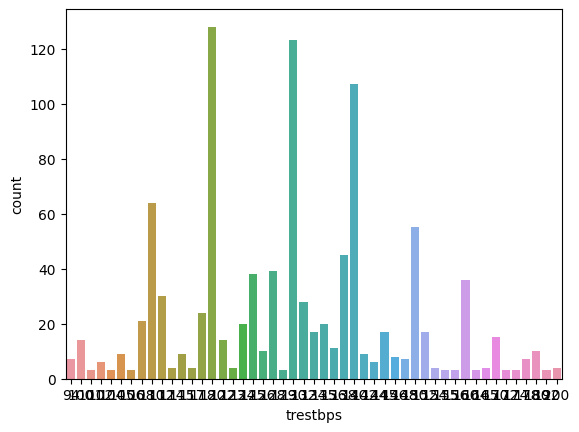

In [8]:
# Visualisasi distribusi Tekanan darah istirahat individu dalam mm Hg.
sns.countplot(x='trestbps', data=df)
plt.show()

Untuk memvisualisasikan distribusi tekanan darah istirahat individu dalam mm Hg, Anda dapat menggunakan berbagai jenis grafik. Salah satu cara yang umum adalah menggunakan histogram.

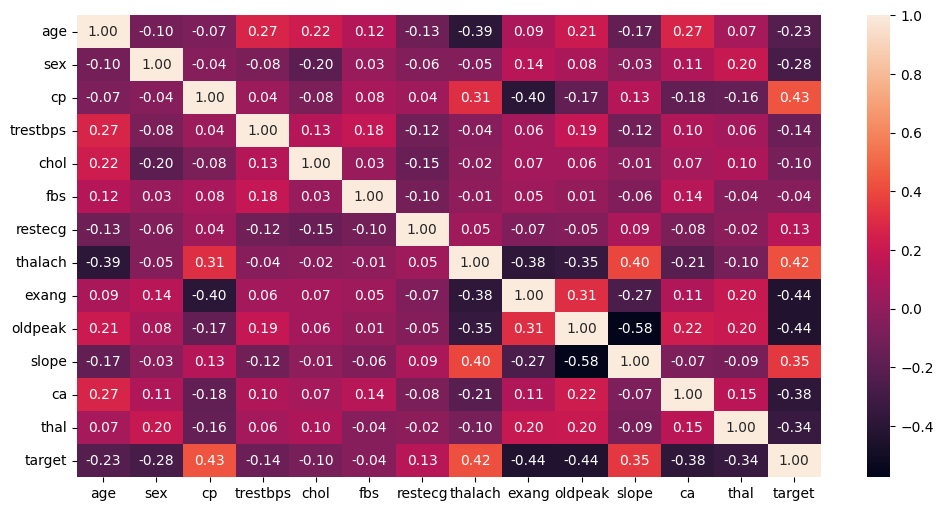

In [11]:
# Korelasi antar fitur
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()


Heatmap ini memberikan visualisasi dari koefisien korelasi Pearson antara setiap pasangan variabel dalam dataset. Nilai korelasi berkisar antara -1 hingga 1, di mana:

- Nilai mendekati 1 menunjukkan korelasi positif yang kuat,
- Nilai mendekati -1 menunjukkan korelasi negatif yang kuat,
- Nilai mendekati 0 menunjukkan tidak ada korelasi.


prompt: buat kode untuk melakukan train dataset menggunakan neural network classification

In [12]:
# Klasifikasi biner: wine dengan kualitas di atas 6 adalah baik (1), sisanya buruk (0)
df['trestbps'] = df['trestbps'].apply(lambda x: 1 if x > 6 else 0)

# Memisahkan fitur dan label
X = df.drop('trestbps', axis=1)
y = df['trestbps']

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



1. **Konversi ke Klasifikasi Biner**: Kualitas wine biasanya dinilai dalam skala numerik. Namun, untuk memudahkan proses klasifikasi menggunakan neural network, kualitas diubah menjadi bentuk biner: 'baik' (1) jika nilai kualitasnya di atas 6 dan 'buruk' (0) jika sebaliknya. Ini memudahkan pembuatan model untuk melakukan klasifikasi biner.

2. **Pemisahan Fitur dan Label**: `X` menjadi kumpulan fitur yang akan digunakan untuk prediksi, dan `y` adalah label (kualitas wine) yang akan diprediksi. Dengan menghilangkan kolom 'quality' dari `X`, kita memisahkan data yang akan digunakan untuk belajar dengan target prediksi yang sebenarnya.

3. **Normalisasi**: Normalisasi data dengan `StandardScaler` mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1. Ini penting untuk neural network agar dapat berkonvergensi lebih cepat dan tidak memiliki bias terhadap fitur dengan skala yang lebih besar.

4. **Pembagian Data**: Data dibagi menjadi set pelatihan dan pengujian menggunakan `train_test_split`. Ini memungkinkan model untuk belajar dari set pelatihan dan kemudian diuji pada set pengujian untuk menilai kinerjanya. `test_size=0.2` berarti 20% dari data akan digunakan untuk pengujian, dan `random_state` diatur untuk memastikan bahwa pembagian data konsisten di seluruh berbagai run.

In [13]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


Kode tersebut mendefinisikan arsitektur untuk model klasifikasi biner menggunakan Keras, sebuah API tingkat tinggi untuk neural networks:

1. **Inisialisasi Model**: `Sequential()` membuat model berurutan, yang merupakan tumpukan lapisan linear.

2. **Menambahkan Lapisan (Layers)**:
   - Lapisan pertama adalah `Dense` layer dengan 12 neuron dan fungsi aktivasi ReLU (`activation='relu'`). `input_dim=X_train.shape[1]` menetapkan jumlah fitur masukan.
   - Lapisan kedua adalah `Dense` layer lain dengan 8 neuron, juga menggunakan aktivasi ReLU.
   - Lapisan ketiga adalah output layer dengan 1 neuron menggunakan aktivasi sigmoid, cocok untuk klasifikasi biner.

3. **Kompilasi Model**: Model dikompilasi dengan:
   - `loss='binary_crossentropy'`, yang adalah fungsi kerugian yang sesuai untuk klasifikasi biner.
   - `optimizer=Adam(learning_rate=0.001)`, yang adalah metode untuk melakukan update bobot jaringan secara efisien.
   - `metrics=['accuracy']` untuk melacak akurasi klasifikasi selama pelatihan dan pengujian.

Ini adalah model dasar dengan dua lapisan tersembunyi yang bisa disesuaikan dan diperluas tergantung pada kompleksitas masalah dan performa yang diinginkan.

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=165, batch_size=10)

Epoch 1/165
82/82 [==============================] - 7s 6ms/step - loss: 0.2524 - accuracy: 0.9646 - val_loss: 0.1347 - val_accuracy: 0.9951
Epoch 2/165
82/82 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9988 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 3/165
82/82 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 4/165
82/82 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 5/165
82/82 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 6/165
82/82 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 7/165
82/82 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 8/165
8

Kode tersebut digunakan untuk melatih (fit) model neural network yang telah didefinisikan pada data pelatihan. Berikut adalah detail dari setiap argumen:

- `X_train, y_train`: Data dan label yang digunakan untuk pelatihan.
- `validation_data=(X_test, y_test)`: Data dan label yang digunakan untuk validasi. Model akan dievaluasi terhadap data ini di akhir setiap epoch.
- `epochs=165`: Jumlah lengkap siklus pelatihan melalui seluruh dataset pelatihan. Model akan melihat keseluruhan data pelatihan sebanyak 165 kali.
- `batch_size=10`: Jumlah sampel per pembaharuan gradien. Ini menentukan jumlah sampel yang diproses sebelum model melakukan pembaruan bobot.

Selama proses pelatihan, model akan menggunakan data pelatihan untuk belajar dan data validasi untuk menilai seberapa baik model memprediksi data yang belum dilihat. Informasi yang dikumpulkan selama pelatihan (seperti akurasi dan kerugian di setiap epoch) disimpan dalam objek `history` untuk analisis lebih lanjut.

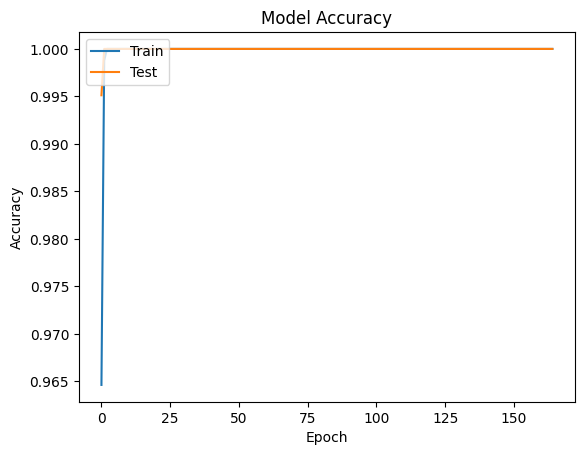

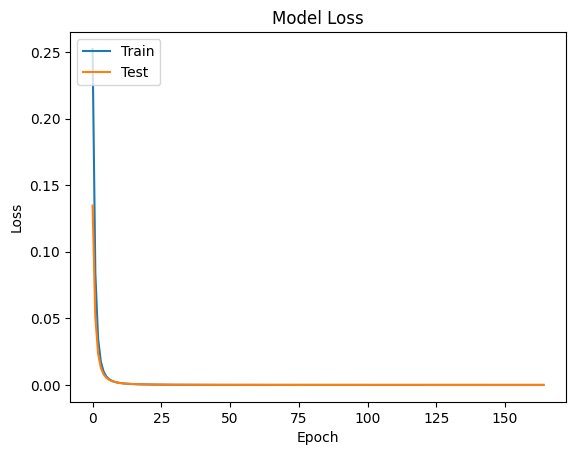

In [15]:
# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Kode ini digunakan untuk memvisualisasikan kinerja model selama proses pelatihan:

- **Plotting Akurasi**:
  - `history.history['accuracy']` menunjukkan akurasi pelatihan di setiap epoch.
  - `history.history['val_accuracy']` menunjukkan akurasi validasi.
  - Grafik ini menggambarkan bagaimana akurasi berubah seiring waktu selama pelatihan.

- **Plotting Loss**:
  - `history.history['loss']` menunjukkan nilai loss pelatihan.
  - `history.history['val_loss']` menunjukkan nilai loss validasi.
  - Grafik ini menggambarkan bagaimana loss berubah seiring waktu selama pelatihan.

Kedua plot ini penting untuk menilai proses pembelajaran model, dimana kita dapat melihat jika model mengalami overfitting, underfitting, atau telah cukup baik dalam mempelajari pola dari data.